# **Maestría en Inteligencia Artificial Aplicada (MNA)**
## **Procesamiento de Lenguaje Natural (NLP)**
### Prof. Luis Eduardo Falcón Morales
### **Actividad Semanas 6 y 7: Modelado de tópicos - LSI/LDA**
### Modelado de Temas: LSI / LDA.
---

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

## **Ejercicios**

### **Ejercicio 1.** 
Descarga el archivo noticiasTopicModeling.txt que se encuentra en Canvas. Este archivo consiste en  5658 noticias de varios periódicos de España. El archivo de texto es una lista en el siguiente  formato: [{“titular”:”Encabezado“, “texto”:”Cuerpo”}, ... , {“titular”:”Encabezado”,”texto”:”Cuerpo”}]  Donde “titular” es el encabezado de la noticia y “texto” es el cuerpo del texto de dicha noticia. En particular en esta actividad trabajarás solamente con los cuerpos de las noticias, sin incluir los encabezados. Carga dicho archivo y genera un DataFrame de Pandas llamado “df” y que contiene una única columna llamada “noticia” con 5658 renglones formados por los cuerpos de las noticias. 

In [5]:
file = "noticiasTopicModeling.txt"

In [14]:
with open(file, "r") as archivo:
    contenido = archivo.read()
    
df = json.loads(contenido)

In [15]:
df = pd.DataFrame(df, columns=['titular', 'texto'])
df = df.drop(columns=['titular'])
df = df.rename({'texto': 'noticia'}, axis=1)

In [68]:
df.shape

(5658, 1)

In [16]:
df.head()

,noticia
0,"""España ha dejado de ser católica"", decía Manu..."
1,El clima de crispación social en Ceuta ha lleg...
2,El Gobierno ha alegado la suspensión de plazos...
3,"Puedes mandar tu pregunta, sugerencia o queja ..."
4,Panamá debe entregar esta semana a la Corte In...


### **Ejercicio 2.** 
Realiza un proceso de limpieza. Aplica el preprocesamiento que consideres adecuado para texto en español. Recuerda que el objetivo es identificar los tokens (palabras) que describan mejor la distribución de cada tema. NOTA: Recuerda que esta es una técnica no supervisada, por lo que no requerimos hacer una partición de los datos. 

In [89]:
import nltk
from nltk.corpus import stopwords
import re
import stanza
from unidecode import unidecode

In [18]:
nltk.download('punkt')    
nltk.download('stopwords') 

[nltk_data] Downloading package punkt to /home/yvillamil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/yvillamil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

#### 2.1. Stopwords

In [55]:
mystopwords = stopwords.words('spanish')

#### 2.2. Class method

[Lematizador](https://medium.com/escueladeinteligenciaartificial/procesamiento-de-lenguaje-natural-stemming-y-lemmas-f5efd90dca8)

In [22]:
stanza.download("es")

2024-05-28 01:54:11 INFO: Downloaded file to /home/yvillamil/stanza_resources/resources.json
2024-05-28 01:54:11 INFO: Downloading default packages for language: es (Spanish) ...


2024-05-28 01:59:37 INFO: Downloaded file to /home/yvillamil/stanza_resources/es/default.zip
2024-05-28 01:59:41 INFO: Finished downloading models and saved to /home/yvillamil/stanza_resources


In [100]:
class cleaning:
    
    def __init__(self, nlp):
        # Instanciamos el lemmatizador a ser usado
        self.nlp = nlp
    
    def clean_tok(self, doc, mystopwords):
        # Reemplazamos la ñ por la n
        doc = doc.replace('ñ', 'n')
        # Retirar signos de puntuación
        patter_puntuacion = r'[^\w\s]'
        doc = re.sub(patter_puntuacion, '', doc)
        # remover tildes
        doc = unidecode(doc)
        # Consideramos solo los caracteres especiales
        pattern = r'[^a-zA-Z\s]'
        doc = re.sub(pattern, ' ', doc)
        # Se pasaran todas las palabras a minusculas
        doc = doc.lower()
        # Eliminamos stopwords
        doc = ' '.join([word for word in doc.split() if word not in (mystopwords)])

        return doc

    def clean_doc(self, doc):
        # Instanciamos el lemmatizador a ser usado
        docs = self.nlp(doc)
        # Separamos las palabras
        data = [word.lemma for sent in docs.sentences for word in sent.words]
        
        return data

In [101]:
nlp = stanza.Pipeline(lang='es', processors='tokenize,lemma', download_method=None, verbose=False)
cleaning_class = cleaning(nlp=nlp)

In [102]:
x_clean_docs = [cleaning_class.clean_tok(x, mystopwords) for x in df.noticia] 

In [103]:
x_lemma_docs = [cleaning_class.clean_doc(doc) for doc in x_clean_docs]

### **Parte 1: Indexación semántica latente (LSI)**
---

### **Ejercicio 3**

Encontrar la matriz Tf-idf de la columna de noticias. Despliega los primeros 5 renglones con algunas de sus columnas con sus nombres, donde las columnas son los tokens. ¿Cuál es el significado de cada renglón? ¿Y el significado de cada columna?

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [117]:
docs = [word for word in x_lemma_docs if word not in mystopwords]

In [123]:
# Conjuntamos los documentos de nuevo en una lista de strings,
# que viene a ser nuestra document-term-matrix, DTM:

ddf = []

for doc in docs:
    tmp = ' '.join(doc)
    ddf.append(tmp)
    
ddf[:5]

['espana dejar ser catolica decia manuel azana comienzo segundo republica aquel congreso diputado aprobo ley laicista metafora dejar ser catolica papel ley creencia buen parte pueblo migracion integracion europeo programa vox europa saber mas espana domingo noviembre dejar ser excepcion europa potencia extremo derecha parlamento tambien metafora pues precisamente excepcional tener dictadura mediados setenta dictador aun mausoleo despue ano muerto existia tal cosa portugal grecia italia alemania pais dictadura fascista espana si paso portugal italia alemania derroto fascismo franquismo murio cama harakiri corte franquista ruptura regimen sino reforma nacio nuevo pais sino pais muto ley ley aun asi espana parecia vacunada si ano franquismo ser bastante llegar irrupcion posfranquismo tras ser actor fundamental gobierno autonomico local pp ciudadano espana dejar ser excepcion aunque alianza popular manuel fraga bebiera franquismo sociologico fuerza nuevo bla pinar bunker franquista aunque 

In [133]:
tfidf = TfidfVectorizer(lowercase=False, 
                        max_df=1.0,  
                        min_df=1   
                       )

tfidf_sparse = tfidf.fit_transform(ddf)  

In [135]:
tfidf_dense = pd.DataFrame(tfidf_sparse.toarray(), columns=tfidf.get_feature_names_out()) 
tfidf_dense.head(5)

,UNK,aa,aaas,aac,aahjko,aai,aaiun,aalla,aamir,aamma,...,zuwittgenstein,zuzendaritzaren,zuzeneko,zvi,zwift,zwvy,zyed,zón,él,órden
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011952,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025076,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016654,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070870,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007523,0.0


### **Ejercicio 4**

Aplica el método de descomposición de valores singulares truncado a la matriz Tf-idf anterior con 10 componentes y obtener el gráfico de la importancia relativa de estas. 

In [138]:
from sklearn.decomposition import TruncatedSVD

In [139]:
r = 10    
lsi_obj = TruncatedSVD(n_components = r, 
                       n_iter=100,  # número de iteraciones ... recordemos que es un método iterativo.
                       random_state=42) 

tfidf_lsi = lsi_obj.fit_transform(tfidf_sparse)    # ndarray: se ajusta y aplica la SVD truncada.
Sigma = lsi_obj.singular_values_     # ndarray_(r,)
V_T = lsi_obj.components_.T        

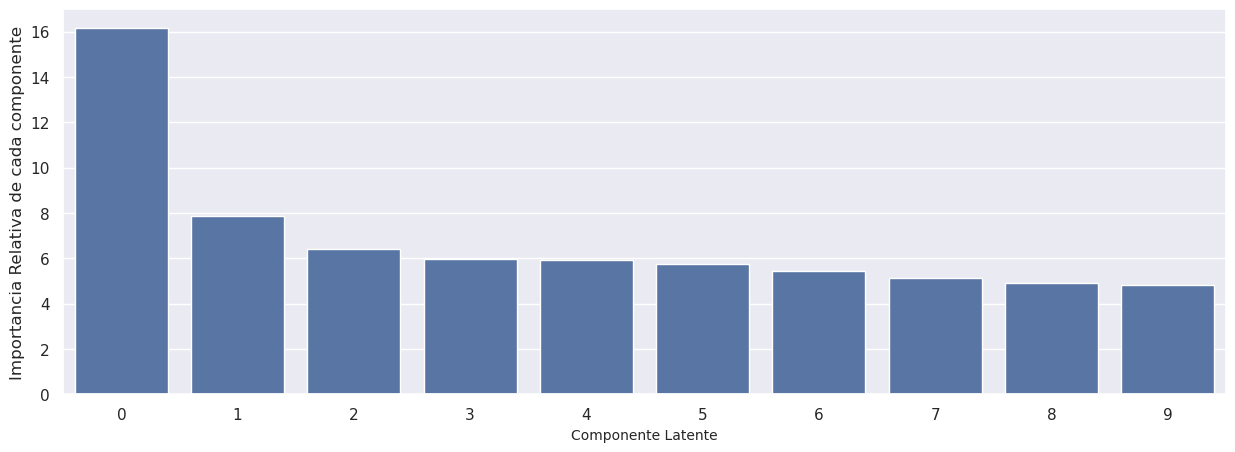

In [145]:
sns.set_theme(rc={'figure.figsize':(15,5)}) 
chart = sns.barplot(x=list(range(len(Sigma))), y = Sigma )
chart.set_xlabel('Componente Latente', fontdict={'size': 10})
chart.set_ylabel('Importancia Relativa de cada componente', fontdict={'size': 12})
plt.show()

### **Ejercicio 5**

Obtener la matriz tokens-temas (term-topic) a partir de la matriz 𝑉் de la descomposición SVD. Despliega sus primeros 5 renglones donde se incluya el nombre de las columnas.

In [146]:
lsi_term_topic = V_T
term_names = list(tfidf.get_feature_names_out())
term_topic_matrix = pd.DataFrame(data=lsi_term_topic, 
                                 index = term_names,   
                                 columns = [f'Concepto_Latente_{r}' for r in range(0,V_T.shape[1])])

In [157]:
term_topic_matrix.sort_values(by='Concepto_Latente_8', ascending=False)[:5]

,Concepto_Latente_0,Concepto_Latente_1,Concepto_Latente_2,Concepto_Latente_3,Concepto_Latente_4,Concepto_Latente_5,Concepto_Latente_6,Concepto_Latente_7,Concepto_Latente_8,Concepto_Latente_9
coronavirus,0.125633,0.260309,0.088980,-0.042972,-0.053506,0.043837,0.019914,-0.125047,0.184793,0.073041
madrid,0.101375,0.020372,0.123512,-0.176593,-0.129613,-0.147878,0.002102,0.028591,0.157551,-0.158479
ayuso,0.041428,0.015017,0.094491,-0.146620,-0.068330,-0.094947,-0.002480,-0.000540,0.145836,-0.138916
boletin,0.038191,0.061305,0.010883,-0.022752,0.010617,-0.008269,0.021740,-0.055697,0.139723,0.017491
informacion,0.056077,0.045877,0.008066,0.023676,-0.022866,-0.031931,0.020748,-0.063534,0.126554,0.016943


### **Ejercicio 6**

Con base a la cantidad de conceptos latentes que determinaste en el ejercicio anterior, obtener cada uno de sus gráficos con sus 10 términos/tokens más importantes. ¿Cómo describirías cada uno de dichos conceptos latentes? ¿Se identifican claramente las temáticas de cada uno de ellos?

In [170]:
def get_latent_topics(top_w, term_topic_matrix):
    
    fig, axs = plt.subplots(5, 2, figsize=(20, 25))
    axs = axs.flatten()
    
    for i, col in enumerate(term_topic_matrix.columns):
        
        # Obtener los datos de cada concepto latente y ordenamos
        data = term_topic_matrix[col]
        data = data.sort_values(ascending=False)     
        top_w_matrix = data[:top_w]    
                                       
        # Graficamos los 10 tokens más importantes para cada concepto latente     
        sns.barplot(x= top_w_matrix.values, y=top_w_matrix.index, ax=axs[i], hue=top_w_matrix.index, legend=False)
        axs[i].set_title(f'Mejores términos/tokens del {col}')   
        axs[i].set_ylabel('Conteo-token')

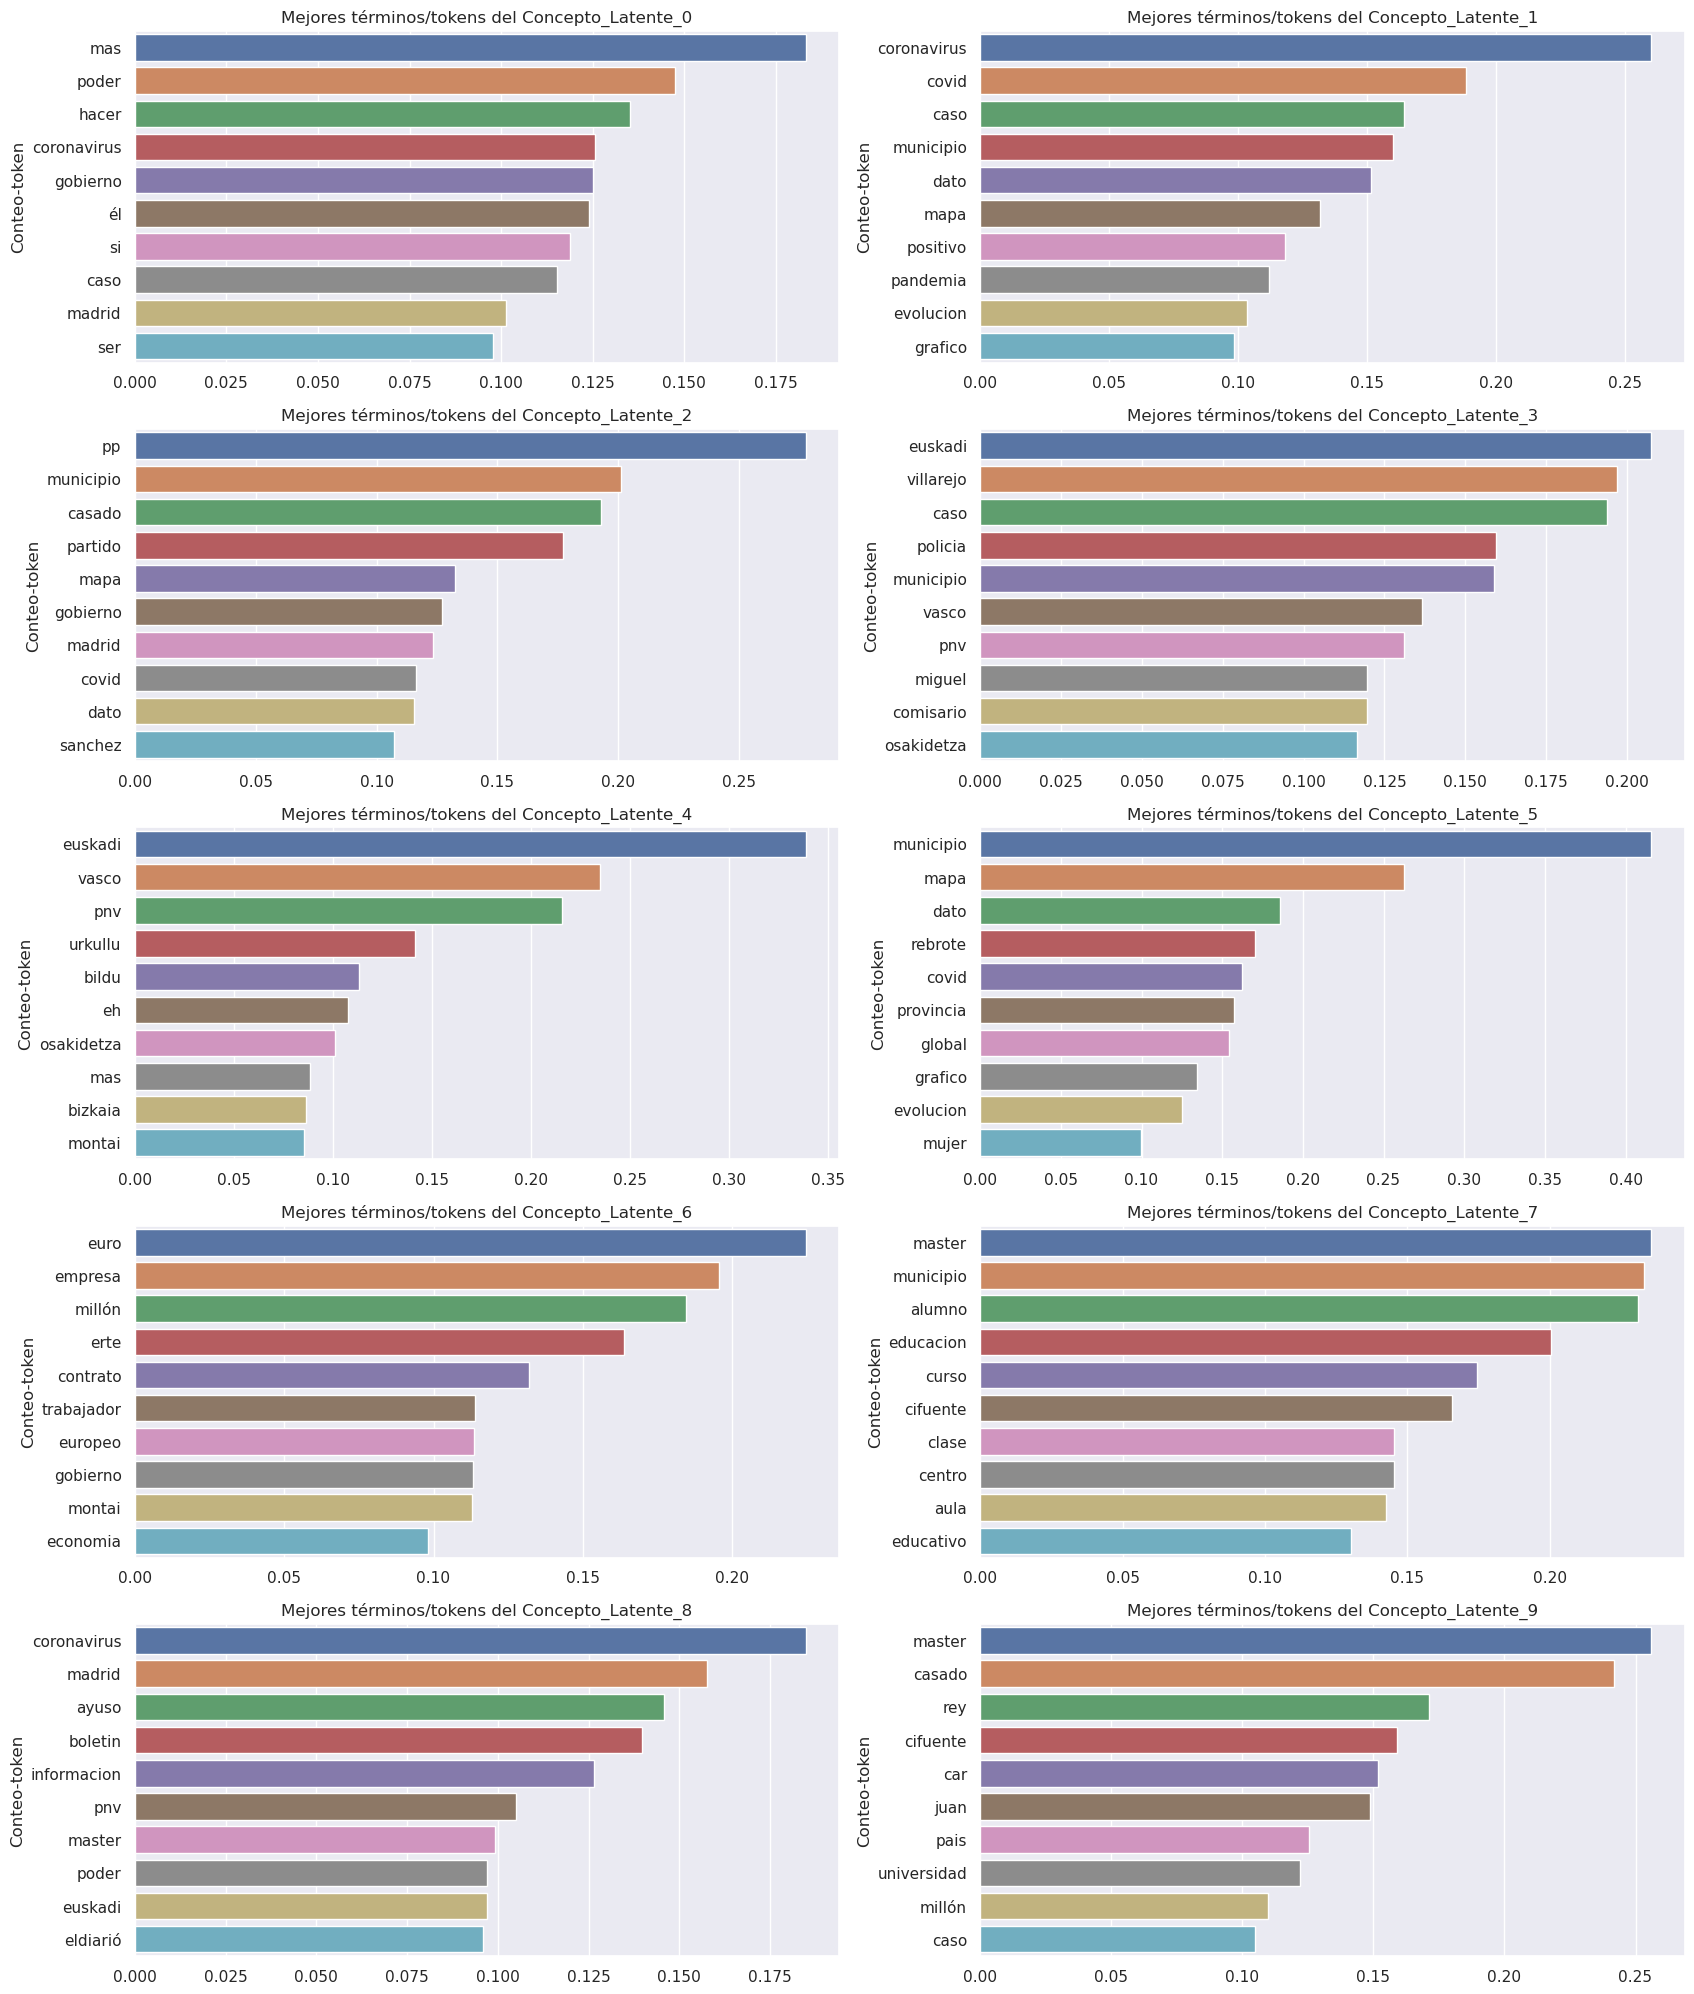

In [171]:
get_latent_topics(10, term_topic_matrix)

### **Parte 2: Asignación de Dirichlet Latente (LDA)**
---

### **Ejercicio 7**

Utiliza la librería Gensim para implementar ahora la técnica de LDA. Revisa la documentación correspondiente y aplica de preferencia el modelo paralelizable: 
* https://radimrehurek.com/gensim/models/ldamodel.html  
* https://radimrehurek.com/gensim/models/ldamulticore.html  

### **Ejercicio 8**

Con base a esta técnica ¿qué cantidad de tópicos consideras que es la más adecuada? Compara tus resultados con el método LSI. ¿Qué encuentras de coincidencias y diferencias? ¿Cuál consideras puede ser el mejor resultado, es decir, cuál consideras puede ser la mejor cantidad de tópicos a considerar?

### **Ejercicio 9**

Incluye tus conclusiones finales de la actividad. 